# Data cleaning y Preprocesamiento de Datos

El preprocesamiento de datos - a veces también conocido como transformación de datos o, incluso, ingeniería de features (atributos) - es probablemente una de las parte más importante del trabajo del Data Scientist. Si bien hay muchos aspectos por cubrir en preprocesamiento, solo estudiaremos:

1. Valores Faltantes
2. Valores Atípicos (outliers)
3. Escalado de Datos
4. Encoders

Algunos de los pasos que se revisarán en esta temática pueden hacerse indistintamente en Pandas o Scikit-Learn. De forma general: si se está haciendo exploración de datos, mejor usar Pandas. Si ya se está en un flujo de Machine Learning, entonces Scikit-Learn.

**Valores Faltantes**

* En Pandas explorar las funcionalidades `isna()`, `dropna()` y `fillna()`.
* En Scikit-Learn explorar la clase `SimpleImputer`.

**Valores Atípicos**

* Para aplicar los criterios mencionados, hay que usar las técnicas de visualización ya conocidas, calcular percentiles, promedios y desviaciones estándar con NumPy o Pandas, y usar máscaras.
* En Scikit-Learn hay métodos para trabajar con valores atípicos. Si bien no los utilizaremos, [acá](https://scikit-learn.org/stable/modules/outlier_detection.html) se presenta la documentación.

**Escalado de Datos**
* Se puede hacer a mano con las herramientas de NumPy o Pandas
* En Scikit-Learn existe una variedad de clases que pueden ser útiles en este proceso.

**Encoders**
* En Pandas explorar las funcionalidades `get_dummies()` y `map()`
* En Scikit-Learn explorar la clase `LabelEncoder` y `OneHotEncoder`.

**Bonus 1:** los conceptos de Calidad de datos se exploran de forma muy clara en el artículo [The Ultimate Guide to Data Cleaning](https://towardsdatascience.com/the-ultimate-guide-to-data-cleaning-3969843991d4).

**Bonus 2:** curso para explorar. [Ver curso](https://www.kaggle.com/learn/intermediate-machine-learning).

## 1. Valores Faltantes

En este ejercicio se revisa un dataset de seis columnas y 1500 instancias. Salvo una columna (`V1`), todas tienen valores faltantes. De las columnas con valores faltantes:
* Dos tienen valores faltantes MCAR (el valor faltante es completamente al azar y no depende de otras variables)
* Una tiene valores faltantes MAR (la probabilidad de valor faltante depende de otra variable).
* Una tiene valores faltantes MNAR (la probabilidad de valor faltante depende de esa misma variable).

### 1.1 MCAR, MAR o MNAR

El objetivo de esta sección es analizar el origen de estos valores faltantes. Para ello se sugiere:

+ Abrir los datos y explorarlos (se recomienda un `pairplot` (con y sin `hue`) de Seaborn
+ Contar los valores faltantes por columna
+ Entender: ¿Qué tipo de datos son?¿Cuáles son sus distribuciones?¿Hay alguna columna correlacionada con otra?

In [2]:
data.head()

,V1,V2,V3,V4,V5
0,C,1.0,986.175237,184.258917,2224.638050
1,C,1.0,994.130276,NaN,2570.213101
2,A,1.0,985.782622,196.893581,2309.238832
3,A,1.0,1029.464887,192.063247,2349.259233
4,A,1.0,1004.357092,NaN,2474.036357


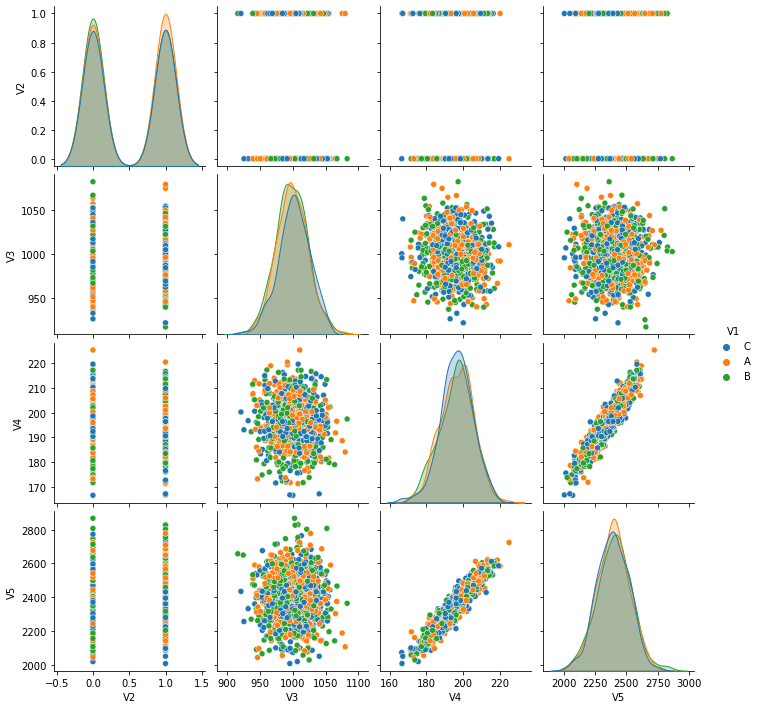

In [3]:
sns.pairplot(data, hue = 'V1' )

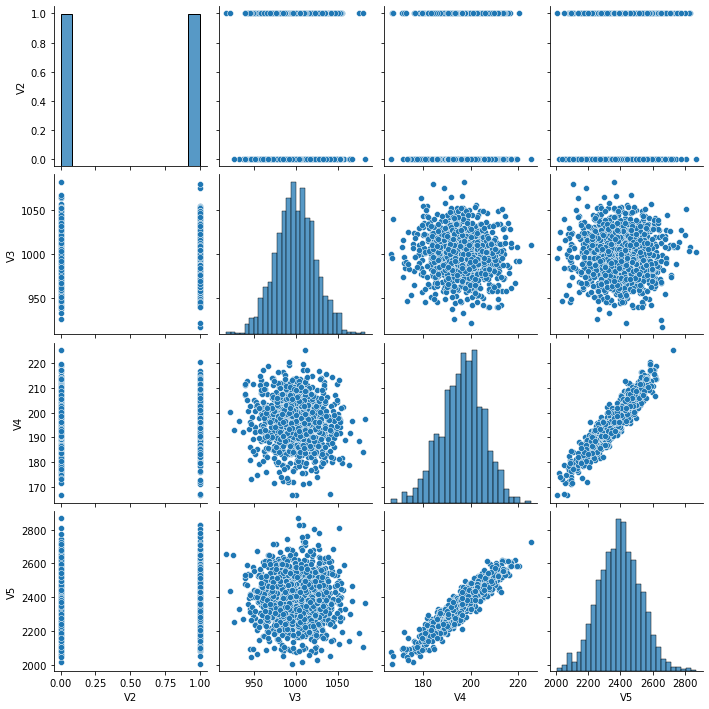

In [4]:
sns.pairplot(data)

In [19]:
# Tipo de datos y faltantes por columna
print(data.isna().sum())
data.info()
data.notnull().apply(pd.Series.value_counts)

V1      0
V2    159
V3    104
V4    413
V5    118
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      1500 non-null   object 
 1   V2      1341 non-null   float64
 2   V3      1396 non-null   float64
 3   V4      1087 non-null   float64
 4   V5      1382 non-null   float64
dtypes: float64(4), object(1)
memory usage: 58.7+ KB


,V1,V2,V3,V4,V5
False,NaN,159,104,413,118
True,1500.0,1341,1396,1087,1382


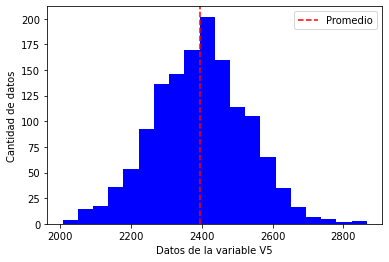

In [9]:
# Distribuciones de las variables
variable = 'V5'
fig, ax = plt.subplots()
ax.hist(data[variable], bins = 20, color='b')
ax.set_xlabel('Datos de la variable ' + variable)
ax.set_ylabel('Cantidad de datos')
plt.axvline(np.mean(data[variable]), c = 'r', linestyle = '--', label = 'Promedio')
ax.legend();

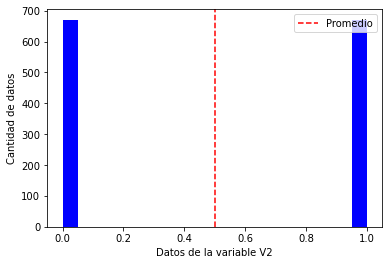

In [15]:
# Distribuciones de las variables
variable = 'V2'
fig, ax = plt.subplots()
ax.hist(data[variable], bins = 20, color='b')
ax.set_xlabel('Datos de la variable ' + variable)
ax.set_ylabel('Cantidad de datos')
plt.axvline(np.mean(data[variable]), c = 'r', linestyle = '--', label = 'Promedio')
ax.legend();

Resumen de la exploración:
+ V1 son 500 datos A,B y C
+ V2 son 0 y 1
+ V3 datos que se distribuyen campana al rededor de 1000 (media)
+ V4 datos que se distribuyen campana al rededor de 195 (media)
+ V5 datos que se distribuyen campana al rededor de 2400 (media)

Medidas de tendencia centras (para ver si se distribuyen normal)

In [27]:
print('%.2f' % np.mean(data['V3']))
print(np.median(data['V3']))
moda = np.nan
valores, conteo_valores = np.unique(data['V3'],return_counts = True)
pos = np.argmax(conteo_valores) # Esta línea encuentra el valor que se repite más veces
moda = valores[pos]
print('%.2f' % moda) 

999.69
nan
916.83


In [28]:
print('%.2f' % np.mean(data['V4']))
print(np.median(data['V4']))
moda = np.nan
valores, conteo_valores = np.unique(data['V4'],return_counts = True)
pos = np.argmax(conteo_valores) # Esta línea encuentra el valor que se repite más veces
moda = valores[pos]
print('%.2f' % moda) 

196.41
nan
166.65


In [29]:
print('%.2f' % np.mean(data['V5']))
print(np.median(data['V5']))
moda = np.nan
valores, conteo_valores = np.unique(data['V5'],return_counts = True)
pos = np.argmax(conteo_valores) # Esta línea encuentra el valor que se repite más veces
moda = valores[pos]
print('%.2f' % moda) 

2395.78
nan
2005.86


In [30]:
data.describe()

,V2,V3,V4,V5
count,1341.000000,1396.000000,1087.000000,1382.000000
mean,0.500373,999.686269,196.414056,2395.781409
std,0.500186,24.099044,8.986208,131.714318
min,0.000000,916.828247,166.654303,2005.861180
25%,0.000000,984.023781,190.708818,2306.219362
50%,1.000000,999.385885,196.753671,2397.870540
75%,1.000000,1015.946214,202.423761,2480.880485
max,1.000000,1082.767001,225.195704,2866.799351


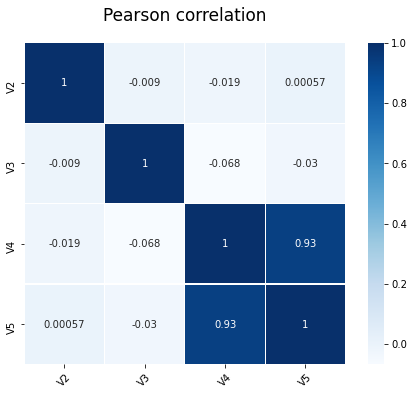

In [31]:
# Correlaciones

corr = data.corr()
plt.figure(figsize=(8,8))
plt.subplot2grid((4,3),(0,0),rowspan = 3, colspan = 3 )
sns.heatmap(corr,linewidths=0.1,vmax=1.0, square=True, cmap='Blues', linecolor='white', annot=True)
plt.title('Correlación de Pearson', y=1.05, size=17)
plt.xticks(rotation = 45)
plt.show()

Parece claro que hay alta correlación positiva entre V4 y V5.

C:\Users\usuario\anaconda3\envs\data science\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\usuario\anaconda3\envs\data science\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


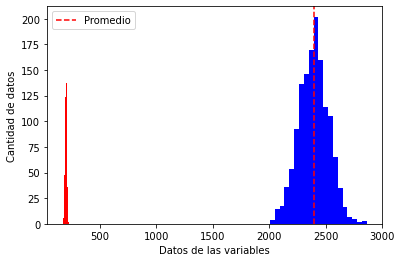

In [32]:
# Histograma para ver relación entre V4 y V5 (y V3)
fig, ax = plt.subplots()
ax.hist(data['V4'], bins = 20, color='r')
ax.hist(data['V5'], bins = 20, color='b')
ax.set_xlabel('Datos de las variables')
ax.set_ylabel('Cantidad de datos')
plt.axvline(np.mean(data['V5']), c = 'r', linestyle = '--', label = 'Promedio')
ax.legend();

2. Búsqueda del mecanismo que dio origen a los valores faltante de cada columna.

**MAR con respecto a `V1`**

Dejamos la línea casi completa para el caso de `V2`:

In [33]:
data.V2.isnull().groupby(data['V1']).sum()
#data.V2.isnull().groupby(data['V1']).sum().astype(int).reset_index(name='count')

V1
A    39
B    52
C    68
Name: V2, dtype: int64

In [34]:
# Para V3
data.V3.isnull().groupby([data['V1'],data['V2']]).sum().astype(int).reset_index(name='count')

,V1,V2,count
0,A,0.0,9
1,A,1.0,19
2,B,0.0,0
3,B,1.0,0
4,C,0.0,29
5,C,1.0,33


In [25]:
# Para V4
data.V4.isnull().groupby([data['V1'],data['V2']]).sum().astype(int).reset_index(name='count')

,V1,V2,count
0,A,0.0,56
1,A,1.0,74
2,B,0.0,65
3,B,1.0,65
4,C,0.0,49
5,C,1.0,58


In [26]:
# Para V5
data.V5.isnull().groupby([data['V1'],data['V2']]).sum().astype(int).reset_index(name='count')

,V1,V2,count
0,A,0.0,12
1,A,1.0,20
2,B,0.0,17
3,B,1.0,25
4,C,0.0,16
5,C,1.0,17


**MNAR**

Las únicas variables correlacionadas son `V4` y `V5`, ambas con valores faltantes. Entonces, podemos usar una para ver si los valores faltantes de la otra son **MNAR**.

Arranquemos estudiando los valores faltantes en `V5`. Para ello, debemos binear `V4` y contar cuántos valores faltantes de `V5` caen en cada intervalo. Entonces, creamos los intervalos para `V4`

In [126]:
data['V4-intervalos'] = pd.cut(data.V4, bins  = 15)
data

,V1,V2,V3,V4,V5,V4-intervalos
0,C,1.0,986.175237,184.258917,2224.638050,"(182.265, 186.168]"
1,C,1.0,994.130276,NaN,2570.213101,NaN
2,A,1.0,985.782622,196.893581,2309.238832,"(193.974, 197.876]"
3,A,1.0,1029.464887,192.063247,2349.259233,"(190.071, 193.974]"
4,A,1.0,1004.357092,NaN,2474.036357,NaN
...,...,...,...,...,...,...
1495,C,0.0,985.188653,190.366109,2302.000694,"(190.071, 193.974]"
1496,C,0.0,991.730134,193.553401,2277.045998,"(190.071, 193.974]"
1497,B,0.0,1032.150519,NaN,2347.760632,NaN
1498,C,1.0,984.522924,196.373516,2393.847484,"(193.974, 197.876]"


y contamos cuántas instancias por intervalo tienen valores faltantes en `V5`.

In [120]:
vf_V4V5 = data.V5.isnull().groupby([data['V4-intervalos']]).sum().astype(int).reset_index(name='count')
vf_V4V5

,V4-intervalos,count
0,"(166.596, 170.557]",0
1,"(170.557, 174.46]",0
2,"(174.46, 178.363]",1
3,"(178.363, 182.265]",2
4,"(182.265, 186.168]",5
5,"(186.168, 190.071]",6
6,"(190.071, 193.974]",17
7,"(193.974, 197.876]",12
8,"(197.876, 201.779]",20
9,"(201.779, 205.682]",13


Pero en realidad lo que nos interesa es la frecuencia de estos valores faltantes, porque no todos los intervalos tienen la misma cantidad de instancias.

In [121]:
vf_V4V5['freq'] = vf_V4V5['count']/data.groupby([data['V4-intervalos']]).count()['V4'].values
vf_V4V5

,V4-intervalos,count,freq
0,"(166.596, 170.557]",0,0.000000
1,"(170.557, 174.46]",0,0.000000
2,"(174.46, 178.363]",1,0.062500
3,"(178.363, 182.265]",2,0.051282
4,"(182.265, 186.168]",5,0.060976
5,"(186.168, 190.071]",6,0.063830
6,"(190.071, 193.974]",17,0.104938
7,"(193.974, 197.876]",12,0.065217
8,"(197.876, 201.779]",20,0.109290
9,"(201.779, 205.682]",13,0.084416


Para que sea más fácil e informativo el gráfico, agregamos a este dataframe el punto medio de cada intervalo.

In [122]:
vf_V4V5["bin_centres"] = vf_V4V5["V4-intervalos"].apply(lambda x: x.mid)
vf_V4V5

,V4-intervalos,count,freq,bin_centres
0,"(166.596, 170.557]",0,0.000000,168.5765
1,"(170.557, 174.46]",0,0.000000,172.5085
2,"(174.46, 178.363]",1,0.062500,176.4115
3,"(178.363, 182.265]",2,0.051282,180.3140
4,"(182.265, 186.168]",5,0.060976,184.2165
5,"(186.168, 190.071]",6,0.063830,188.1195
6,"(190.071, 193.974]",17,0.104938,192.0225
7,"(193.974, 197.876]",12,0.065217,195.9250
8,"(197.876, 201.779]",20,0.109290,199.8275
9,"(201.779, 205.682]",13,0.084416,203.7305


y finalmente, graficamos

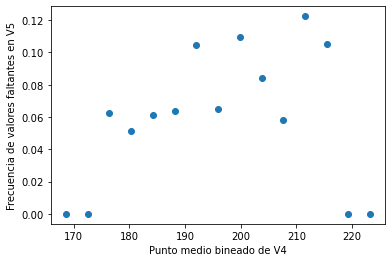

In [123]:
plt.scatter(vf_V4V5['bin_centres'], vf_V4V5['freq'])
plt.xlabel('Punto medio bineado de V4')
plt.ylabel('Frecuencia de valores faltantes en V5')
plt.show()

En la gráfica anterior no hay patrón alguno en los faltantes.

Repetición de los datos invirtiendo el rol de `V5` y `V4`:

In [127]:
data['V5-intervalos'] = pd.cut(data.V5, bins  = 15)
data

,V1,V2,V3,V4,V5,V4-intervalos,V5-intervalos
0,C,1.0,986.175237,184.258917,2224.638050,"(182.265, 186.168]","(2178.049, 2235.445]"
1,C,1.0,994.130276,NaN,2570.213101,NaN,"(2522.424, 2579.82]"
2,A,1.0,985.782622,196.893581,2309.238832,"(193.974, 197.876]","(2292.841, 2350.236]"
3,A,1.0,1029.464887,192.063247,2349.259233,"(190.071, 193.974]","(2292.841, 2350.236]"
4,A,1.0,1004.357092,NaN,2474.036357,NaN,"(2465.028, 2522.424]"
...,...,...,...,...,...,...,...
1495,C,0.0,985.188653,190.366109,2302.000694,"(190.071, 193.974]","(2292.841, 2350.236]"
1496,C,0.0,991.730134,193.553401,2277.045998,"(190.071, 193.974]","(2235.445, 2292.841]"
1497,B,0.0,1032.150519,NaN,2347.760632,NaN,"(2292.841, 2350.236]"
1498,C,1.0,984.522924,196.373516,2393.847484,"(193.974, 197.876]","(2350.236, 2407.632]"


In [128]:
vf_V5V4 = data.V4.isnull().groupby([data['V5-intervalos']]).sum().astype(int).reset_index(name='count')
vf_V5V4

,V5-intervalos,count
0,"(2005.0, 2063.257]",0
1,"(2063.257, 2120.653]",1
2,"(2120.653, 2178.049]",0
3,"(2178.049, 2235.445]",4
4,"(2235.445, 2292.841]",9
5,"(2292.841, 2350.236]",26
6,"(2350.236, 2407.632]",39
7,"(2407.632, 2465.028]",58
8,"(2465.028, 2522.424]",79
9,"(2522.424, 2579.82]",79


In [129]:
vf_V5V4['freq'] = vf_V5V4['count']/data.groupby([data['V5-intervalos']]).count()['V5'].values
vf_V5V4

,V5-intervalos,count,freq
0,"(2005.0, 2063.257]",0,0.000000
1,"(2063.257, 2120.653]",1,0.040000
2,"(2120.653, 2178.049]",0,0.000000
3,"(2178.049, 2235.445]",4,0.049383
4,"(2235.445, 2292.841]",9,0.058824
5,"(2292.841, 2350.236]",26,0.134715
6,"(2350.236, 2407.632]",39,0.157895
7,"(2407.632, 2465.028]",58,0.254386
8,"(2465.028, 2522.424]",79,0.461988
9,"(2522.424, 2579.82]",79,0.612403


In [130]:
vf_V5V4["bin_centres"] = vf_V5V4["V5-intervalos"].apply(lambda x: x.mid)
vf_V5V4

,V5-intervalos,count,freq,bin_centres
0,"(2005.0, 2063.257]",0,0.000000,2034.1285
1,"(2063.257, 2120.653]",1,0.040000,2091.9550
2,"(2120.653, 2178.049]",0,0.000000,2149.3510
3,"(2178.049, 2235.445]",4,0.049383,2206.7470
4,"(2235.445, 2292.841]",9,0.058824,2264.1430
5,"(2292.841, 2350.236]",26,0.134715,2321.5385
6,"(2350.236, 2407.632]",39,0.157895,2378.9340
7,"(2407.632, 2465.028]",58,0.254386,2436.3300
8,"(2465.028, 2522.424]",79,0.461988,2493.7260
9,"(2522.424, 2579.82]",79,0.612403,2551.1220


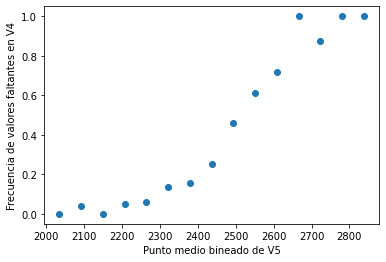

In [131]:
plt.scatter(vf_V5V4['bin_centres'], vf_V5V4['freq'])
plt.xlabel('Punto medio bineado de V5')
plt.ylabel('Frecuencia de valores faltantes en V4')
plt.show()

## 1.2 Imputación de valores faltantes

Existen múltiples formas de realizar imputación de valores faltantes. A manera de introducción se eplora la imputación usando la media, y su efecto sobre los datos. Sin embargo, para la imputación de valores siempre debe revisarse el tipo de problema que se está analizando, y las posibles técnicas de imputación.

In [46]:
data_ch1 = pd.read_csv('DS_Bitácora_19_Data_con_VF.csv')

In [47]:
data_ch1.notnull().apply(pd.Series.value_counts)

,V1,V2,V3,V4,V5
False,NaN,159,104,413,118
True,1500.0,1341,1396,1087,1382


In [143]:
data_ch1["V3"].fillna(data_ch1["V3"].mean(), inplace = True)

Med de tend central originales
Media
999.69
Mediana
nan
Moda
916.83
Nuevas med de tend central
Media
999.69
Mediana
999.6862687520616
Moda
999.69


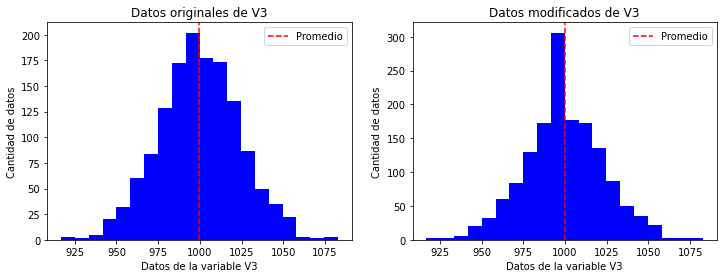

In [174]:
# Distribuciones
variable = 'V3'

plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
#fig, ax = plt.subplots()
plt.hist(data[variable], bins = 20, color='b')
plt.xlabel('Datos de la variable ' + variable)
plt.ylabel('Cantidad de datos')
plt.axvline(np.mean(data[variable]), c = 'r', linestyle = '--', label = 'Promedio')
plt.title('Datos originales de ' + variable)
plt.legend()

plt.subplot(1,2,2)
#fig, ax = plt.subplots()
plt.hist(data_ch1[variable], bins = 20, color='b')
plt.xlabel('Datos de la variable ' + variable)
plt.ylabel('Cantidad de datos')
plt.axvline(np.mean(data[variable]), c = 'r', linestyle = '--', label = 'Promedio')
plt.title('Datos modificados de ' + variable)
plt.legend();

# Med de tend central originales
print('Med de tend central originales')
print('Media:')
print('%.2f' % np.mean(data[variable]))
print('Mediana:')
print(np.median(data[variable]))
moda = np.nan
valores, conteo_valores = np.unique(data[variable],return_counts = True)
pos = np.argmax(conteo_valores) # Esta línea encuentra el valor que se repite más veces
moda = valores[pos]
print('Moda:')
print('%.2f' % moda) 
print()

# Nuevas med de tend central
print('Nuevas med de tend central')
print('Media')
print('%.2f' % np.mean(data_ch1[variable]))
print('Mediana')
print(np.median(data_ch1[variable]))
moda = np.nan
valores, conteo_valores = np.unique(data_ch1[variable],return_counts = True)
pos = np.argmax(conteo_valores) # Esta línea encuentra el valor que se repite más veces
moda = valores[pos]
print('Moda')
print('%.2f' % moda)

In [165]:
data_ch1["V4"].fillna(data_ch1["V4"].mean(), inplace = True)

Med de tend central originales
Media
196.41
Mediana
nan
Moda
166.65
Nuevas med de tend central
Media
196.41
Mediana
196.41405616191068
Moda
196.41


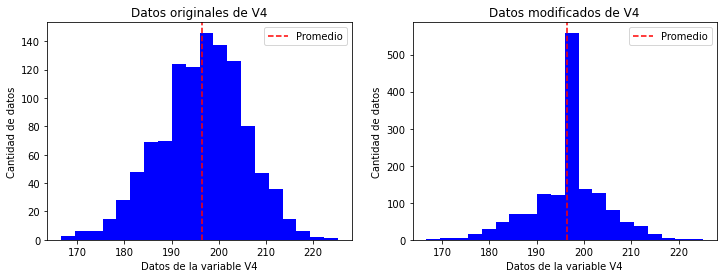

In [175]:
# Distribuciones
variable = 'V4'

plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
#fig, ax = plt.subplots()
plt.hist(data[variable], bins = 20, color='b')
plt.xlabel('Datos de la variable ' + variable)
plt.ylabel('Cantidad de datos')
plt.axvline(np.mean(data[variable]), c = 'r', linestyle = '--', label = 'Promedio')
plt.title('Datos originales de ' + variable)
plt.legend()

plt.subplot(1,2,2)
#fig, ax = plt.subplots()
plt.hist(data_ch1[variable], bins = 20, color='b')
plt.xlabel('Datos de la variable ' + variable)
plt.ylabel('Cantidad de datos')
plt.axvline(np.mean(data[variable]), c = 'r', linestyle = '--', label = 'Promedio')
plt.title('Datos modificados de ' + variable)
plt.legend();

# Med de tend central originales
print('Med de tend central originales')
print('Media')
print('%.2f' % np.mean(data[variable]))
print('Mediana')
print(np.median(data[variable]))
moda = np.nan
valores, conteo_valores = np.unique(data[variable],return_counts = True)
pos = np.argmax(conteo_valores) # Esta línea encuentra el valor que se repite más veces
moda = valores[pos]
print('Moda')
print('%.2f' % moda)
print()

# Nuevas med de tend central
print('Nuevas med de tend central')
print('Media')
print('%.2f' % np.mean(data_ch1[variable]))
print('Mediana')
print(np.median(data_ch1[variable]))
moda = np.nan
valores, conteo_valores = np.unique(data_ch1[variable],return_counts = True)
pos = np.argmax(conteo_valores) # Esta línea encuentra el valor que se repite más veces
moda = valores[pos]
print('Moda')
print('%.2f' % moda)

In [172]:
data_ch1["V5"].fillna(data_ch1["V5"].mean(), inplace = True)

Med de tend central originales
Media
2395.78
Mediana
nan
Moda
2005.86
Nuevas med de tend central
Media
2395.78
Mediana
2395.781409219903
Moda
2395.78


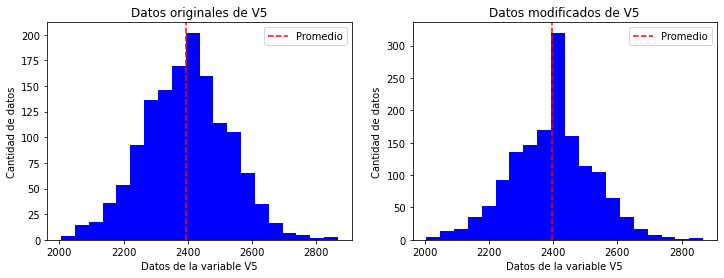

In [176]:
# Distribuciones
variable = 'V5'

plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
#fig, ax = plt.subplots()
plt.hist(data[variable], bins = 20, color='b')
plt.xlabel('Datos de la variable ' + variable)
plt.ylabel('Cantidad de datos')
plt.axvline(np.mean(data[variable]), c = 'r', linestyle = '--', label = 'Promedio')
plt.title('Datos originales de ' + variable)
plt.legend()

plt.subplot(1,2,2)
#fig, ax = plt.subplots()
plt.hist(data_ch1[variable], bins = 20, color='b')
plt.xlabel('Datos de la variable ' + variable)
plt.ylabel('Cantidad de datos')
plt.axvline(np.mean(data[variable]), c = 'r', linestyle = '--', label = 'Promedio')
plt.title('Datos modificados de ' + variable)
plt.legend();

# Med de tend central originales
print('Med de tend central originales')
print('Media')
print('%.2f' % np.mean(data[variable]))
print('Mediana')
print(np.median(data[variable]))
moda = np.nan
valores, conteo_valores = np.unique(data[variable],return_counts = True)
pos = np.argmax(conteo_valores) # Esta línea encuentra el valor que se repite más veces
moda = valores[pos]
print('Moda')
print('%.2f' % moda) 

# Nuevas med de tend central
print('Nuevas med de tend central')
print('Media')
print('%.2f' % np.mean(data_ch1[variable]))
print('Mediana')
print(np.median(data_ch1[variable]))
moda = np.nan
valores, conteo_valores = np.unique(data_ch1[variable],return_counts = True)
pos = np.argmax(conteo_valores) # Esta línea encuentra el valor que se repite más veces
moda = valores[pos]
print('Moda')
print('%.2f' % moda)

## 2. Valores Atípicos

Para la exploración de datos con fines de identificar ouliers se recomienda usar visualizaciones `distplot` y `boxplot`.
Una vez identificados, establecer regiones del dominio, calcular estadísticos y, en particular, revisar los rangos.
En el manejo de outliers es común aplicar la técnica del rango interquartílico y la regla de las tres sigmas para seleccionar outliers.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from colorama import Fore
import seaborn as sns
%matplotlib inline

data1_ch2 = pd.read_csv('DS_Bitácora_19_Data_VA1.csv')
data2_ch2 = pd.read_csv('DS_Bitácora_19_Data_VA2.csv')
# Estos datos están completos. No tienen faltantes.

### Visualizaciones

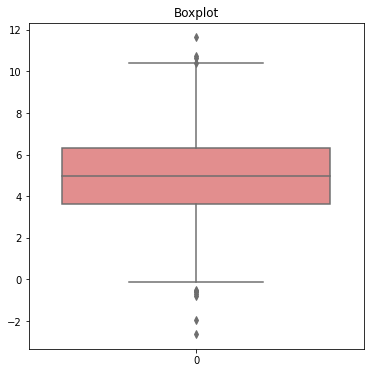

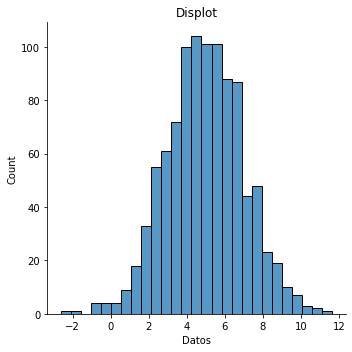

In [5]:
plt.figure(figsize = (6,6))
#plt.subplot(1,2,1)
sns.boxplot(data= data1_ch2['Datos'], color='lightcoral')
plt.title('Boxplot')
#plt.subplot(1,2,2)
sns.displot(data=data1_ch2, x='Datos',kind='hist',height=5, legend=False)
#plt.plot(cuartiles, cuartiles, 'ko', label = 'Cuartiles')
plt.title('Displot')
plt.tight_layout()
plt.show()

### Estadísticos

In [27]:
print('Media: ')
print('%.2f' % np.mean(data1_ch2['Datos']))
print('Valor min')
print(min(data1_ch2['Datos']))
print('Valor max')
print(max(data1_ch2['Datos']))
print('Desv std')
print(np.std(data1_ch2['Datos']))

# Cuartiles
print('Cuartiles')
# Vamos a definir los quartiles
valores = [0,25,50,75,100]
cuartiles = np.percentile(data1_ch2['Datos'],q=valores)
print(cuartiles)
# Resultado: los números dentro de la variable y que acumulan cada cuartil son:

data1_ch2['Datos'].describe()

Media: 
4.95
Valor min
-2.6197807557031263
Valor max
11.62815069102416
Desv std
2.007018426177472
Cuartiles
[-2.61978076  3.60738811  4.96048791  6.33273018 11.62815069]


count    1000.000000
mean        4.952783
std         2.008023
min        -2.619781
25%         3.607388
50%         4.960488
75%         6.332730
max        11.628151
Name: Datos, dtype: float64

**Manejo de outliers**

No hay una sola forma de aplicar estas reglas.

1. Rango Intercuartílico

In [34]:
q25, q75 = np.percentile(data1_ch2['Datos'], [25 ,75])
iqr = q75 - q25 # np.subtract(*np.percentile(data1_ch2['Datos'], [75, 25]))
minimo = np.mean(data1_ch2['Datos']) - 3*np.std(data1_ch2['Datos'])
maximo = np.mean(data1_ch2['Datos']) + 3*np.std(data1_ch2['Datos'])
print(q25,q75,iqr, minimo, maximo)

3.6073881122339304 6.33273017886759 2.7253420666336594 -1.0682720698050572 10.973838487259773


2. Regla de las tres sigmas

In [61]:
minimo = np.mean(data1_ch2['Datos']) - 3*np.std(data1_ch2['Datos'])
minimo

-1.0682720698050572

In [63]:
ls2izq = np.mean(data1_ch2['Datos']) - 2*np.std(data1_ch2['Datos'])
ls2izq

0.9387463563724143

In [65]:
ls1izq = np.mean(data1_ch2['Datos']) - np.std(data1_ch2['Datos'])
ls1izq

2.9457647825498863

In [67]:
media = np.mean(data1_ch2['Datos'])
media

4.952783208727358

In [66]:
ls1der = np.mean(data1_ch2['Datos']) + np.std(data1_ch2['Datos'])
ls1der

6.95980163490483

In [64]:
ls2der = np.mean(data1_ch2['Datos']) + 2*np.std(data1_ch2['Datos'])
ls2der

8.966820061082302

In [62]:
maximo = np.mean(data1_ch2['Datos']) + 3*np.std(data1_ch2['Datos'])
maximo

10.973838487259773

## 3. Escalado de datos (estandarización)

Ssando los datos de la sección anterior, se realizan los sieguientes pasos:

1. Agregar al dataframe una columna que se llame "Datos_Reescalados" y que contenga los datos reescalados por Z-Score. ¿Cuál es el valor medio de los datos reescalados?¿Y su desviación estándar? **Nota:** Para reescalar los datos es posible hacerlo "a mano". Peor también es posible utilizar la clase `StandardScaler` de Scikit-Learn. 
2. Realizar, en un mismo gráfico, un histograma de los datos estandarizados y un histograma de los datos originales.
3. Aplicar la regla de las tres sigmas utilizando los datos reescalados.

In [14]:
data1_pto3_ch2 = pd.read_csv('DS_Bitácora_19_Data_VA1.csv')

In [15]:
print('Media = ' + str(np.mean(data1_pto3_ch2['Datos'])))
print('Desv std = ' + str(np.std(data1_pto3_ch2['Datos'])))

Media = 4.952783208727358
Desv std = 2.007018426177472


In [16]:
values = data1_pto3_ch2['Datos']

In [17]:
from math import sqrt

def standardize(values):
    length_values = len(values)
    meanvalue = sum(values)/length_values
    diffs = [value - meanvalue for value in values]
    std = sqrt(sum([diff**2 for diff in diffs]) / (length_values - 1))
    
    values_standardized = []
    for value in values:
        values_standardized.append((value - meanvalue) / std)

    return values_standardized

In [18]:
data1_pto3_ch2['Datos_Reescalados'] = standardize(values)

In [19]:
data1_pto3_ch2.head()

,Datos,Datos_Reescalados
0,2.370556,-1.285955
1,3.437876,-0.754427
2,6.300131,0.670982
3,5.403170,0.224294
4,5.722120,0.383131


In [20]:
print('Media = ' + str(np.mean(data1_pto3_ch2['Datos_Reescalados'])))
print('Desv std = ' + str(np.std(data1_pto3_ch2['Datos_Reescalados'])))

Media = 1.2789769243681802e-16
Desv std = 0.9994998749374611


In [21]:
#cuartiles
valores = [0,25,50,75,100]
cuartiles = np.percentile(data1_pto3_ch2['Datos'],q=valores)
cuartiles2 = np.percentile(data1_pto3_ch2['Datos_Reescalados'],q=valores)

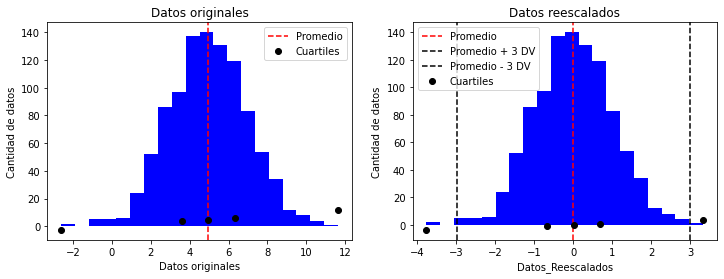

In [22]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
#fig, ax = plt.subplots()
plt.hist(data1_pto3_ch2['Datos'], bins = 20, color='b')
plt.xlabel('Datos originales')
plt.ylabel('Cantidad de datos')
plt.axvline(np.mean(data1_pto3_ch2['Datos']), c = 'r', linestyle = '--', label = 'Promedio')
plt.plot(cuartiles, cuartiles, 'ko', label = 'Cuartiles')
plt.title('Datos originales')
plt.legend()

plt.subplot(1,2,2)
#fig, ax = plt.subplots()
plt.hist(data1_pto3_ch2['Datos_Reescalados'], bins = 20, color='b')
plt.xlabel('Datos_Reescalados')
plt.ylabel('Cantidad de datos')
plt.axvline(np.mean(data1_pto3_ch2['Datos_Reescalados']), c = 'r', linestyle = '--', label = 'Promedio')
plt.axvline(np.mean(data1_pto3_ch2['Datos_Reescalados']) + 3* np.std(data1_pto3_ch2['Datos_Reescalados']), c = 'k', linestyle = '--', label = 'Promedio + 3 DV')
plt.axvline(np.mean(data1_pto3_ch2['Datos_Reescalados']) - 3* np.std(data1_pto3_ch2['Datos_Reescalados']), c = 'k', linestyle = '--', label = 'Promedio - 3 DV')
plt.plot(cuartiles2, cuartiles2, 'ko', label = 'Cuartiles')
plt.title('Datos reescalados')
plt.legend();

In [23]:
q25, q75 = np.percentile(data1_pto3_ch2['Datos'], [25 ,75])
iqr = q75 - q25 # np.subtract(*np.percentile(data1_ch2['Datos'], [75, 25]))
minimo = np.mean(data1_pto3_ch2['Datos']) - 3*np.std(data1_pto3_ch2['Datos'])
maximo = np.mean(data1_pto3_ch2['Datos']) + 3*np.std(data1_pto3_ch2['Datos'])
print(q25,q75,iqr, minimo, maximo)

3.6073881122339304 6.33273017886759 2.7253420666336594 -1.0682720698050572 10.973838487259773


In [24]:
q25, q75 = np.percentile(data1_pto3_ch2['Datos_Reescalados'], [25 ,75])
iqr = q75 - q25 # np.subtract(*np.percentile(data1_ch2['Datos'], [75, 25]))
minimo = np.mean(data1_pto3_ch2['Datos_Reescalados']) - 3*np.std(data1_pto3_ch2['Datos_Reescalados'])
maximo = np.mean(data1_pto3_ch2['Datos_Reescalados']) + 3*np.std(data1_pto3_ch2['Datos_Reescalados'])
print(q25,q75,iqr, minimo, maximo)

-0.6700099078052743 0.6872168217719831 1.3572267295772573 -2.998499624812383 2.998499624812383


## 4. Investigar: Encoders